In [1]:
from gurobipy import *
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
results = pd.read_table('variable_values.txt')
n = results[results["results"].str.contains("n")]
u = results[results["results"].str.contains("u")]
c = results[results["results"].str.contains("c")]
varn = n['results'].str.split('=').apply(lambda x: x[0])
valn = n['results'].str.split('=').apply(lambda x: x[1])
t = varn.str.split('n').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[0])
i = varn.str.split('n').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[1])
k = varn.str.split('n').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[2])
amount = valn
specificn = pd.DataFrame(np.array([t,i,k,amount]).T).reset_index(drop=True)
specificn.columns = ['t','i', 'k', 'amount']
specificn['name'] = 'n'

varu = u['results'].str.split('=').apply(lambda x: x[0])
valu = u['results'].str.split('=').apply(lambda x: x[1])
t = varu.str.split('u').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[0])
i = varu.str.split('u').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[1])
j = varu.str.split('u').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[2])
k = varu.str.split('u').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[3])
amount = valu
specificu = pd.DataFrame(np.array([t,i,j,k,amount]).T).reset_index(drop=True)
specificu.columns = ['t','i', 'j', 'k', 'amount']
specificu['name'] = 'u'

varc = c['results'].str.split('=').apply(lambda x: x[0])
valc = c['results'].str.split('=').apply(lambda x: x[1])
t = varc.str.split('c').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[0])
i = varc.str.split('c').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[1])
x = varc.str.split('c').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[2])
y = varc.str.split('c').apply(lambda x: ast.literal_eval(x[1])).apply(lambda x: x[3])
amount = valc
specificc = pd.DataFrame(np.array([t,i,x,y,amount]).T).reset_index(drop=True)
specificc.columns = ['t','i', 'x', 'y', 'amount']
specificc['name'] = 'c'
specificn['amount'] = specificn['amount'].astype(float)
specificu['amount'] = specificu['amount'].astype(float)
specificc['amount'] = specificc['amount'].astype(float)


In [3]:
specificn = specificn.groupby('t').sum().reset_index()
specificu = specificu.groupby('t').sum().reset_index()
specificc = specificc.groupby('t').sum().reset_index()

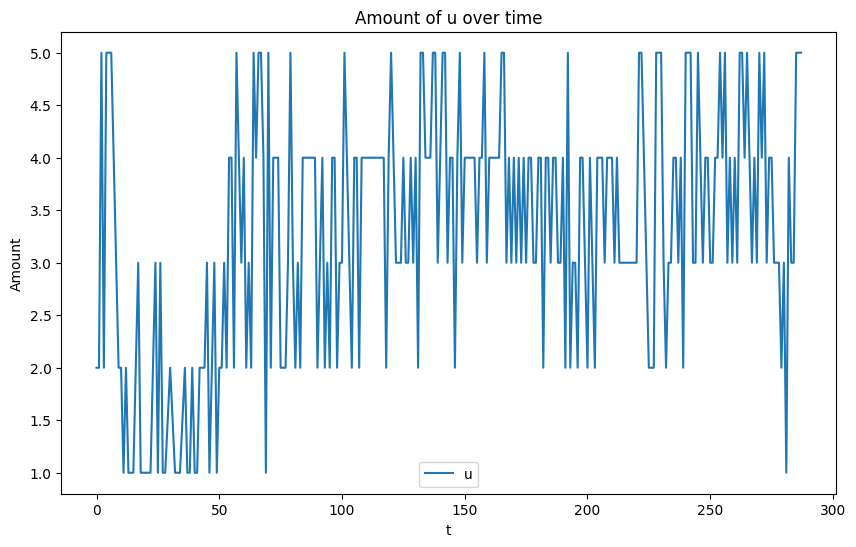

In [4]:
# Data from specificu
specificu_t = list(specificu['t'])
specificu_amount = list(specificu['amount'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(specificu_t, specificu_amount, label='u')
plt.xlabel('t')
plt.ylabel('Amount')
plt.title('Amount of u over time')
plt.legend()
plt.show()


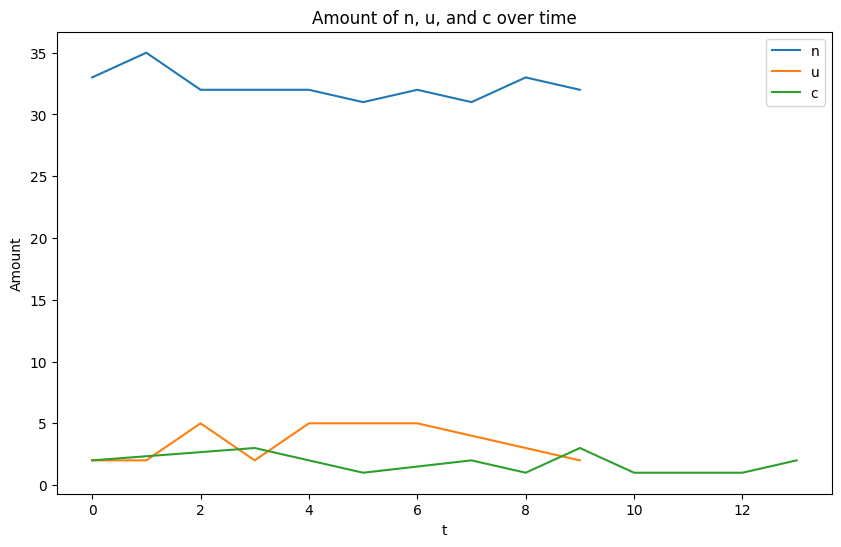

In [5]:


# Data from specificn
specificn_t = list(specificn['t'][:10])
specificn_amount = list(specificn['amount'][:10])

# Data from specificu
specificu_t = list(specificu['t'][:10])
specificu_amount = list(specificu['amount'][:10])

# Data from specificc
specificc_t = list(specificc['t'][:10])
specificc_amount = list(specificc['amount'][:10])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(specificn_t, specificn_amount, label='n')
plt.plot(specificu_t, specificu_amount, label='u')
plt.plot(specificc_t, specificc_amount, label='c')
plt.xlabel('t')
plt.ylabel('Amount')
plt.title('Amount of n, u, and c over time')
plt.legend()
plt.show()
